In [105]:
import os 
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, lasso_path, lars_path, enet_path
%run script.py

In [2]:
data = pd.read_csv('./data/train.csv')
data.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [3]:
y = data['critical_temp']
X = data[data.columns[['wtd' in column for column in data.columns]]]

In [4]:
# data.isnull().sum()
# data.info()
# data.describe()

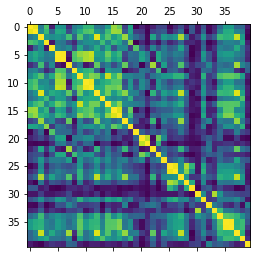

In [6]:
cor_mat = X.corr().abs()
plt.matshow(cor_mat)
plt.show()

In [7]:
upper_tri = cor_mat.where(np.triu(np.ones(cor_mat.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.8)]
X1 = X.drop(to_drop , axis = 1)

C:\Users\SYSTEM~1\AppData\Local\Temp/ipykernel_12436/3496919744.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_tri = cor_mat.where(np.triu(np.ones(cor_mat.shape),k=1).astype(np.bool))


In [8]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data = vif_data.sort_values(by = ['VIF'])
vif_data

,feature,VIF
28,wtd_range_FusionHeat,21.455095
32,wtd_entropy_ThermalConductivity,26.571066
29,wtd_std_FusionHeat,29.757415
39,wtd_std_Valence,32.887193
19,wtd_std_Density,33.737970
31,wtd_gmean_ThermalConductivity,37.275511
18,wtd_range_Density,39.538832
13,wtd_range_atomic_radius,44.444574
3,wtd_range_atomic_mass,45.044338
33,wtd_range_ThermalConductivity,53.179429


In [9]:
top_19 = vif_data.feature[:19]
sum([x in to_drop for x in list(top_19)])

6

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2, shuffle = False)
print(f'X_train: {X_train.shape}\ny_train: {y_train.shape}')
print(f'X_test: {X_test.shape}\ny_test: {y_test.shape}')

X_train: (17010, 20)
y_train: (17010,)
X_test: (4253, 20)
y_test: (4253,)


In [11]:
mlr_model = LinearRegression().fit(X_train, y_train)
mlr_model.coef_

array([-2.32204702e-04,  1.28714549e+01, -1.87178808e-02,  3.91603540e-01,
        4.69324973e-02, -1.67842904e+01, -8.38469491e-03, -4.21922319e-02,
       -3.02026636e-03, -2.32289445e-01,  6.20511627e-02,  1.76050332e-01,
        1.20342012e-01, -4.70942873e-01,  6.46702774e-01, -6.19750338e-01,
        2.43747662e+01, -8.50987201e-02,  3.30739280e+00, -1.75444650e+01])

In [91]:
# y_pred = mlr_model.predict(X_test)
# rss = ((y_test - y_pred)**2).sum();rss
# tss = ((y_test - y_test.mean())**2).sum();tss
# ((tss-rss)/tss)*100

In [12]:
mlr_model.score(X_test, y_test)

0.5149331033022688

In [104]:
y_pred = model.predict(X_test)
rss = ((y_test - y_pred)**2).sum();rss
tss = ((y_test - y_test.mean())**2).sum();tss
((tss-rss)/tss)*100

50.81145750527371

In [77]:
lasso_model = Lasso(alpha=0.9)
lasso_model.fit(X_train, y_train)
lasso_model.score(X_test, y_test)

0.5116033539669627

In [79]:
ridge_model = Ridge(alpha = 0.8)
ridge_model.fit(X_train, y_train)
ridge_model.score(X_test, y_test)

0.5150650240398488

In [98]:
np.linspace(1,20,20)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])

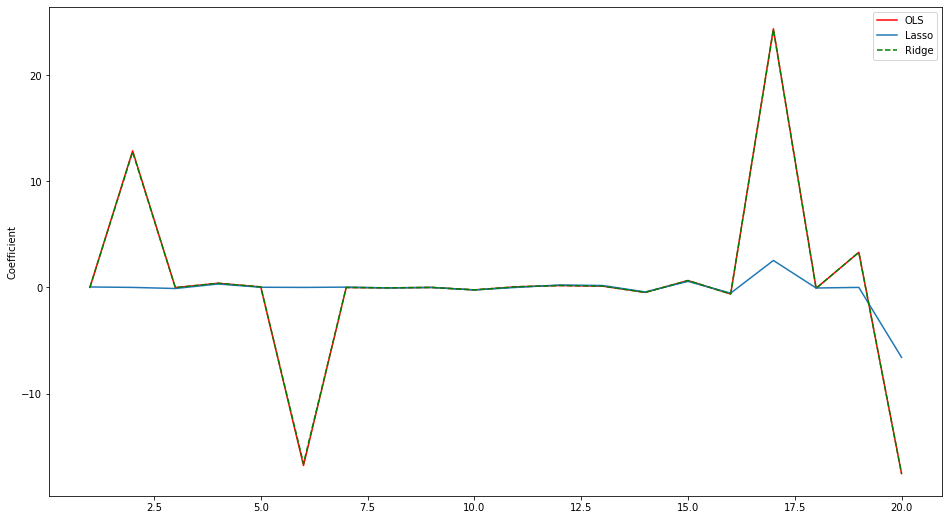

In [99]:
plt.figure(figsize = (16,9))
xx = np.linspace(1,20,20)
plt.plot(xx, mlr_model.coef_, label = 'OLS', color = 'red')
plt.plot(xx, lasso_model.coef_, label = 'Lasso')
plt.plot(xx, ridge_model.coef_, label = 'Ridge', linestyle = 'dashed', color = 'green')
plt.xlabel(''); plt.ylabel('Coefficient'); plt.title('')
plt.legend(loc = 'best')
plt.show()

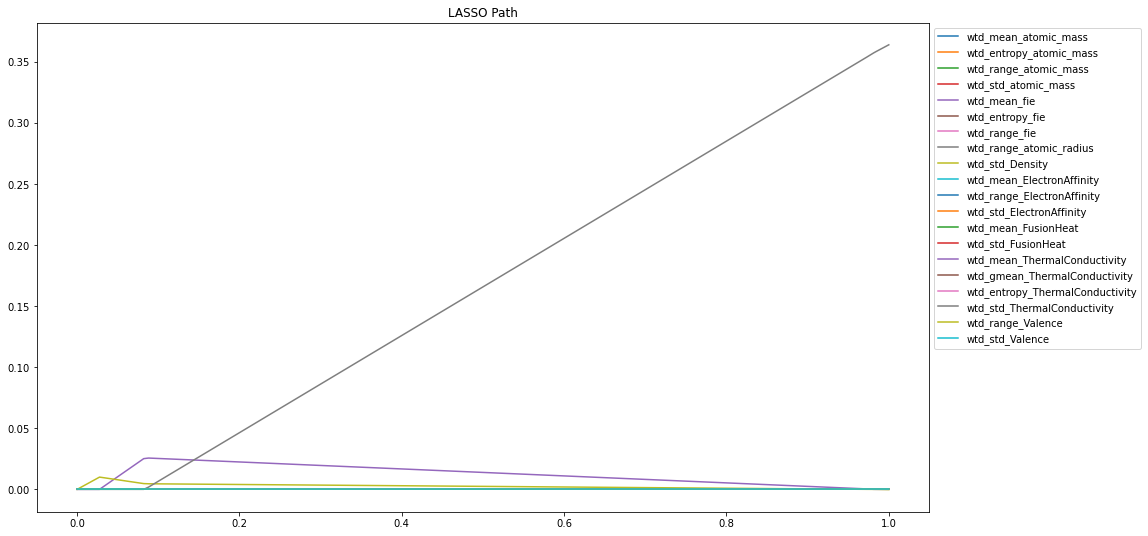

In [66]:
alpha, coefs, _ = lasso_path(np.array(X_train), np.array(y_train))
coefs = pd.DataFrame(coefs.T, columns = X_train.columns)
xx = np.sum(np.abs(np.array(coefs)), axis=1)
xx /= xx[-1]
plt.figure(figsize = (16,9))
plt.plot(xx, coefs)
plt.legend(X_train.columns, bbox_to_anchor = (1,1))
plt.title("LASSO Path")
plt.axis("tight")
plt.show()

.

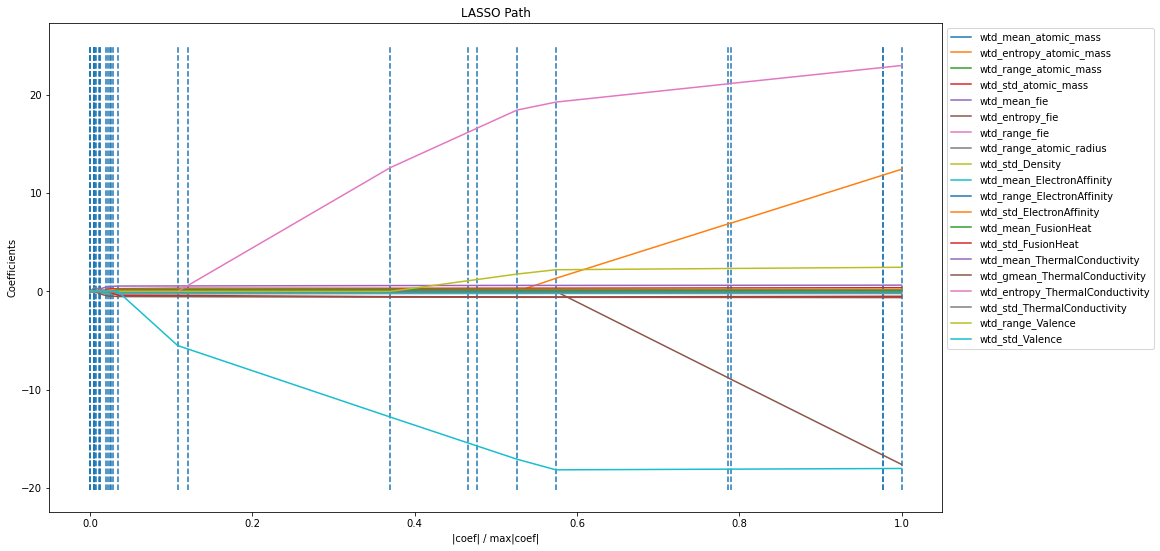

In [113]:
_, _, coefs = lars_path(np.array(X_train), np.array(y_train), method = "lasso", verbose=True)
coefs = pd.DataFrame(coefs.T, columns = X_train.columns)
xx = np.sum(np.abs(np.array(coefs)), axis=1)
xx /= xx[-1]
plt.figure(figsize = (16,9))
plt.plot(xx, coefs)
plt.legend(X_train.columns, bbox_to_anchor = (1,1))
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle="dashed")
plt.xlabel("|coef| / max|coef|")
plt.ylabel("Coefficients")
plt.title("LASSO Path")
plt.axis("tight")
plt.show()

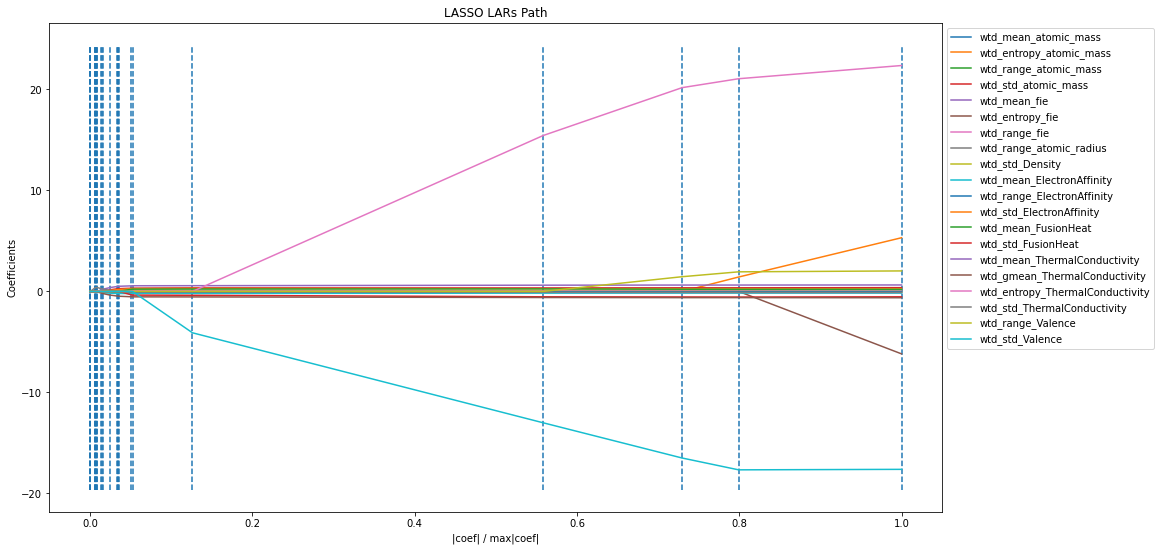

In [73]:
_, _, coefs = lars_path(np.array(X_train), np.array(y_train))
coefs = pd.DataFrame(coefs.T, columns = X_train.columns)
xx = np.sum(np.abs(np.array(coefs)), axis=1)
xx /= xx[-1]
plt.figure(figsize = (16,9))
plt.plot(xx, coefs)
plt.legend(X_train.columns, bbox_to_anchor = (1,1))
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle="dashed")
plt.xlabel("|coef| / max|coef|")
plt.ylabel("Coefficients")
plt.title("LASSO LARs Path")
plt.axis("tight")
plt.show()

X_train:(17010, 20)
y_train:(17010,)
Iteration: 0, Cost: 1391.036
Iteration: 1, Cost: 1341.955
Iteration: 2, Cost: 1297.103
Iteration: 3, Cost: 1255.977
Iteration: 4, Cost: 1218.141
Iteration: 5, Cost: 1183.215
Iteration: 6, Cost: 1150.864
Iteration: 7, Cost: 1120.800
Iteration: 8, Cost: 1092.768
Iteration: 9, Cost: 1066.547
Iteration: 10, Cost: 1041.944
Iteration: 11, Cost: 1018.789
Iteration: 12, Cost: 996.934
Iteration: 13, Cost: 976.248
Iteration: 14, Cost: 956.618
Iteration: 15, Cost: 937.945
Iteration: 16, Cost: 920.139
Iteration: 17, Cost: 903.123
Iteration: 18, Cost: 886.830
Iteration: 19, Cost: 871.199
Iteration: 20, Cost: 856.177
Iteration: 21, Cost: 841.717
Iteration: 22, Cost: 827.778
Iteration: 23, Cost: 814.321
Iteration: 24, Cost: 801.315
Iteration: 25, Cost: 788.730
Iteration: 26, Cost: 776.540
Iteration: 27, Cost: 764.721
Iteration: 28, Cost: 753.251
Iteration: 29, Cost: 742.113
Iteration: 30, Cost: 731.288
Iteration: 31, Cost: 720.760
Iteration: 32, Cost: 710.517
Iter

Iteration: 487, Cost: 240.737
Iteration: 488, Cost: 240.715
Iteration: 489, Cost: 240.694
Iteration: 490, Cost: 240.672
Iteration: 491, Cost: 240.651
Iteration: 492, Cost: 240.630
Iteration: 493, Cost: 240.609
Iteration: 494, Cost: 240.588
Iteration: 495, Cost: 240.566
Iteration: 496, Cost: 240.546
Iteration: 497, Cost: 240.525
Iteration: 498, Cost: 240.504
Iteration: 499, Cost: 240.483
Iteration: 500, Cost: 240.462
Iteration: 501, Cost: 240.441
Iteration: 502, Cost: 240.421
Iteration: 503, Cost: 240.400
Iteration: 504, Cost: 240.380
Iteration: 505, Cost: 240.359
Iteration: 506, Cost: 240.339
Iteration: 507, Cost: 240.318
Iteration: 508, Cost: 240.298
Iteration: 509, Cost: 240.278
Iteration: 510, Cost: 240.258
Iteration: 511, Cost: 240.237
Iteration: 512, Cost: 240.217
Iteration: 513, Cost: 240.197
Iteration: 514, Cost: 240.177
Iteration: 515, Cost: 240.157
Iteration: 516, Cost: 240.137
Iteration: 517, Cost: 240.117
Iteration: 518, Cost: 240.098
Iteration: 519, Cost: 240.078
Iteration:

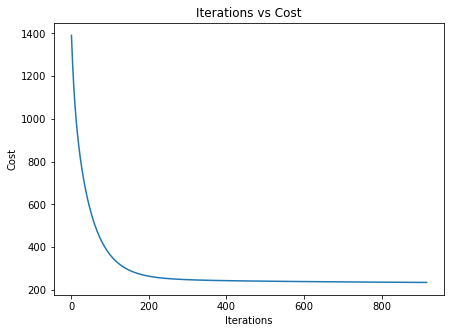

In [107]:
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")

batch_regressor = Regressor(normalize = True)
batch_regressor.fit(X_train,y_train)

train_score = r2_score(batch_regressor.predict(X_train),y_train)
test_score = r2_score(batch_regressor.predict(X_test),y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
batch_regressor.plot()

X_train:(17010, 20)
y_train:(17010,)
Iteration: 0, Cost: 1311.118
Iteration: 1, Cost: 1267.793
Iteration: 2, Cost: 1228.022
Iteration: 3, Cost: 1191.399
Iteration: 4, Cost: 1157.569
Iteration: 5, Cost: 1126.221
Iteration: 6, Cost: 1097.082
Iteration: 7, Cost: 1069.912
Iteration: 8, Cost: 1044.503
Iteration: 9, Cost: 1020.668
Iteration: 10, Cost: 998.245
Iteration: 11, Cost: 977.093
Iteration: 12, Cost: 957.085
Iteration: 13, Cost: 938.111
Iteration: 14, Cost: 920.073
Iteration: 15, Cost: 902.886
Iteration: 16, Cost: 886.473
Iteration: 17, Cost: 870.769
Iteration: 18, Cost: 855.712
Iteration: 19, Cost: 841.251
Iteration: 20, Cost: 827.339
Iteration: 21, Cost: 813.934
Iteration: 22, Cost: 801.000
Iteration: 23, Cost: 788.503
Iteration: 24, Cost: 776.415
Iteration: 25, Cost: 764.709
Iteration: 26, Cost: 753.360
Iteration: 27, Cost: 742.350
Iteration: 28, Cost: 731.657
Iteration: 29, Cost: 721.264
Iteration: 30, Cost: 711.158
Iteration: 31, Cost: 701.322
Iteration: 32, Cost: 691.744
Iterat

Iteration: 276, Cost: 247.368
Iteration: 277, Cost: 247.269
Iteration: 278, Cost: 247.172
Iteration: 279, Cost: 247.075
Iteration: 280, Cost: 246.980
Iteration: 281, Cost: 246.887
Iteration: 282, Cost: 246.794
Iteration: 283, Cost: 246.703
Iteration: 284, Cost: 246.613
Iteration: 285, Cost: 246.524
Iteration: 286, Cost: 246.436
Iteration: 287, Cost: 246.350
Iteration: 288, Cost: 246.265
Iteration: 289, Cost: 246.180
Iteration: 290, Cost: 246.097
Iteration: 291, Cost: 246.015
Iteration: 292, Cost: 245.934
Iteration: 293, Cost: 245.854
Iteration: 294, Cost: 245.775
Iteration: 295, Cost: 245.697
Iteration: 296, Cost: 245.620
Iteration: 297, Cost: 245.544
Iteration: 298, Cost: 245.468
Iteration: 299, Cost: 245.394
Iteration: 300, Cost: 245.321
Iteration: 301, Cost: 245.248
Iteration: 302, Cost: 245.177
Iteration: 303, Cost: 245.106
Iteration: 304, Cost: 245.036
Iteration: 305, Cost: 244.967
Iteration: 306, Cost: 244.899
Iteration: 307, Cost: 244.831
Iteration: 308, Cost: 244.765
Iteration:

Iteration: 550, Cost: 237.312
Iteration: 551, Cost: 237.294
Iteration: 552, Cost: 237.277
Iteration: 553, Cost: 237.259
Iteration: 554, Cost: 237.242
Iteration: 555, Cost: 237.224
Iteration: 556, Cost: 237.207
Iteration: 557, Cost: 237.189
Iteration: 558, Cost: 237.172
Iteration: 559, Cost: 237.154
Iteration: 560, Cost: 237.137
Iteration: 561, Cost: 237.120
Iteration: 562, Cost: 237.102
Iteration: 563, Cost: 237.085
Iteration: 564, Cost: 237.068
Iteration: 565, Cost: 237.051
Iteration: 566, Cost: 237.034
Iteration: 567, Cost: 237.017
Iteration: 568, Cost: 237.000
Iteration: 569, Cost: 236.983
Iteration: 570, Cost: 236.966
Iteration: 571, Cost: 236.949
Iteration: 572, Cost: 236.932
Iteration: 573, Cost: 236.916
Iteration: 574, Cost: 236.899
Iteration: 575, Cost: 236.882
Iteration: 576, Cost: 236.865
Iteration: 577, Cost: 236.849
Iteration: 578, Cost: 236.832
Iteration: 579, Cost: 236.816
Iteration: 580, Cost: 236.799
Iteration: 581, Cost: 236.783
Iteration: 582, Cost: 236.766
Iteration:

Iteration: 824, Cost: 233.613
Iteration: 825, Cost: 233.602
Iteration: 826, Cost: 233.592
Iteration: 827, Cost: 233.582
Iteration: 828, Cost: 233.571
Iteration: 829, Cost: 233.561
Iteration: 830, Cost: 233.550
Iteration: 831, Cost: 233.540
Iteration: 832, Cost: 233.530
Iteration: 833, Cost: 233.520
Iteration: 834, Cost: 233.509
Iteration: 835, Cost: 233.499
Iteration: 836, Cost: 233.489
Iteration: 837, Cost: 233.479
Iteration: 838, Cost: 233.468
Iteration: 839, Cost: 233.458
Iteration: 840, Cost: 233.448
Iteration: 841, Cost: 233.438
Iteration: 842, Cost: 233.428
Iteration: 843, Cost: 233.418
Iteration: 844, Cost: 233.408
Iteration: 845, Cost: 233.397
Iteration: 846, Cost: 233.387
Iteration: 847, Cost: 233.377
Iteration: 848, Cost: 233.367
Iteration: 849, Cost: 233.357
Iteration: 850, Cost: 233.347
Iteration: 851, Cost: 233.337
Train Score: 0.3847426567014355
Test Score:  0.282851401707923


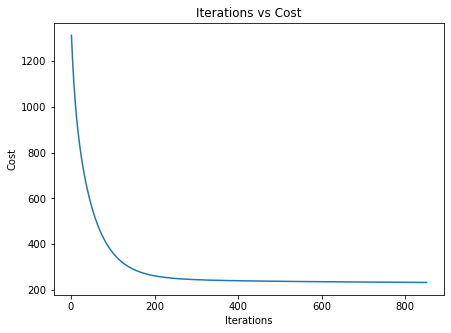

In [111]:
print(f"X_train:{X_train.shape}\ny_train:{y_train.shape}")

seq_regressor = Regressor(normalize = True)
seq_regressor.seq_fit(np.array(X_train),np.array(y_train))

train_score = r2_score(seq_regressor.predict(X_train),y_train)
test_score = r2_score(seq_regressor.predict(X_test),y_test)

print("Train Score:", train_score)
print("Test Score: ",test_score)
seq_regressor.plot()